In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Dataset 1**

In [ ]:
df = pd.read_csv('/content/Breast_cancer_data (1).csv')
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


## Basic EDA

<Axes: >

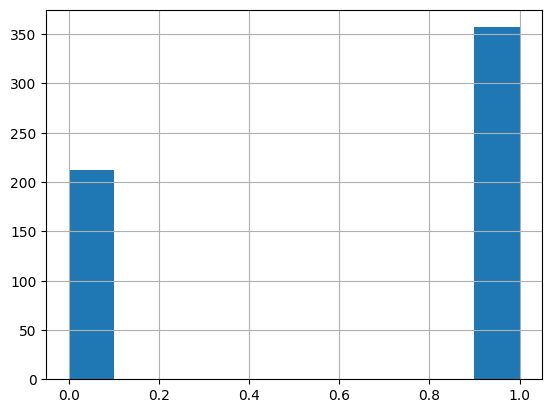

In [ ]:
df["diagnosis"].hist()

<Axes: >

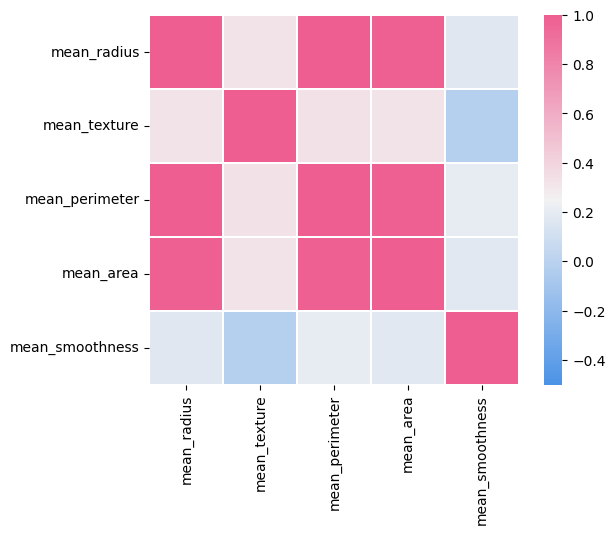

In [ ]:
corr = df.iloc[:,:-1].corr(method="pearson")
cmap = sns.diverging_palette(250,354,80,60,as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=.2)

In [ ]:
df = df[["mean_radius", "mean_texture", "mean_smoothness", "diagnosis"]]
df

,mean_radius,mean_texture,mean_smoothness,diagnosis
0,17.99,10.38,0.11840,0
1,20.57,17.77,0.08474,0
2,19.69,21.25,0.10960,0
3,11.42,20.38,0.14250,0
4,20.29,14.34,0.10030,0
...,...,...,...,...
564,21.56,22.39,0.11100,0
565,20.13,28.25,0.09780,0
566,16.60,28.08,0.08455,0
567,20.60,29.33,0.11780,0


<Axes: >

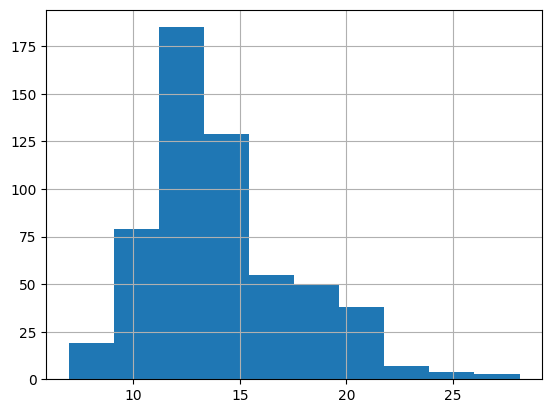

In [ ]:
df['mean_radius'].hist()

<Axes: >

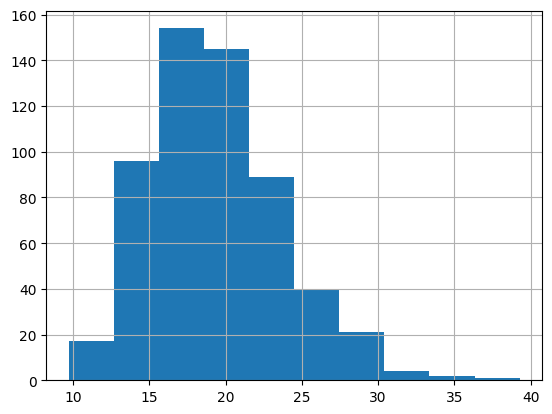

In [ ]:
df['mean_texture'].hist()

<Axes: >

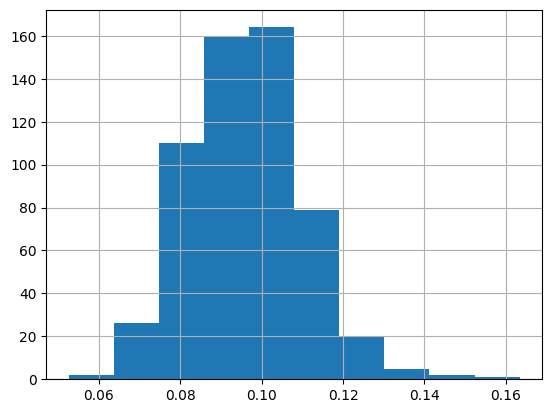

In [ ]:
df['mean_smoothness'].hist()

<Axes: xlabel='mean_texture', ylabel='Count'>

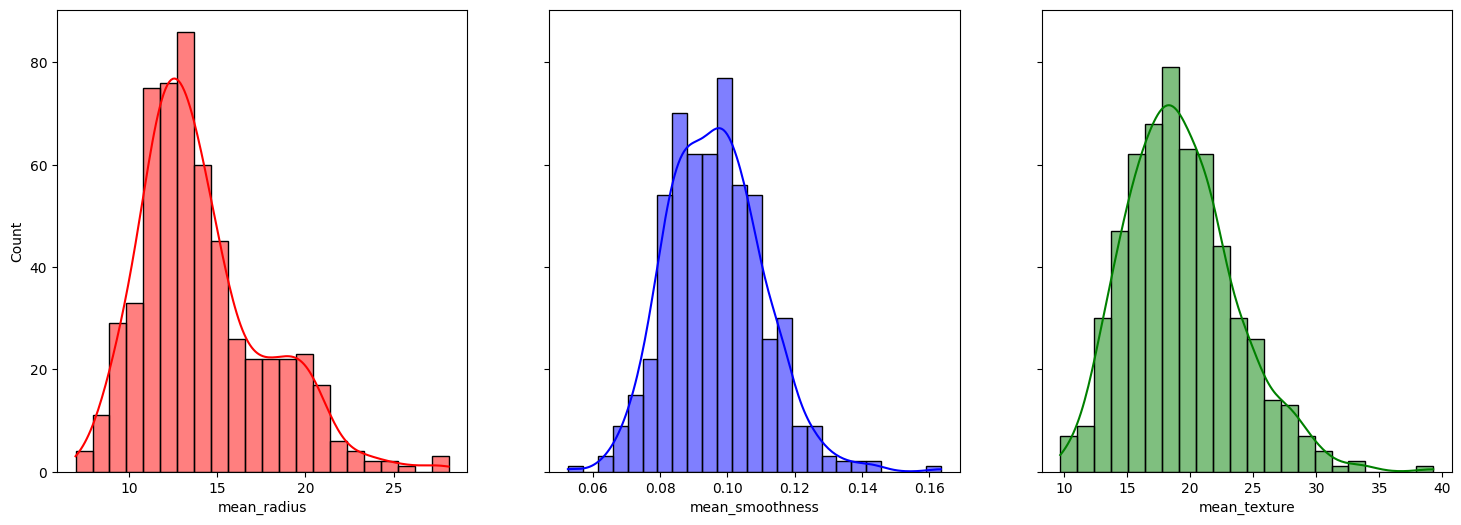

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
sns.histplot(df, ax=axes[0], x="mean_radius", kde=True, color='r')
sns.histplot(df, ax=axes[1], x="mean_smoothness", kde=True, color='b')
sns.histplot(df, ax=axes[2], x="mean_texture", kde=True, color='g')

$$ P(y | X) = \frac{P(X | y) \times P(y)}{P(X)} $$

Where:
- \( P(y | X) \) is the posterior probability of class \( y \) given the features \( X \).
- \( P(X | y) \) is the likelihood of the features \( X \) given class \( y \).
- \( P(y) \) is the prior probability of class \( y \).
- \( P(X) \) is the evidence probability.

The likelihood \( P(X | y) \) can be calculated as:

$$ P(X | y) = P(x_1 | y) \times P(x_2 | y) \times \ldots \times P(x_n | y) $$

Where:
- \( P(x_i | y) \) is the probability of observing feature \( x_i \) given class \( y \).

The posterior probability \( P(y | X) \) is calculated for each class, and the instance is assigned to the class with the highest posterior probability.


In [ ]:
def calcPrior(df, Y):
    classes = sorted(list(df[Y].unique()))
    prior = []
    for i in classes:
        prior.append(len(df[df[Y]==i])/len(df))
    return prior

In [ ]:
def gaussian(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y]==label]
    mean, std = df[feat_name].mean(), df[feat_name].std()
    p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((feat_val-mean)**2 / (2 * std**2 )))
    return p_x_given_y

In [ ]:
def naive_bayes(df, X, Y):
    features = list(df.columns)[:-1]
    prior = calcPrior(df, Y)
    Y_pred = []
    for x in X:
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= gaussian(df, features[i], x[i], Y, labels[j])

        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred)

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.25, random_state=41)

X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values

Y_pred = naive_bayes(train, X=X_test, Y="diagnosis")

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred))

[[48  5]
 [ 0 90]]
0.972972972972973


## Dataset 2

In [ ]:
df1 = pd.read_csv('/content/Social_Network_Ads.csv')
df1

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1["Gender"] = le.fit_transform(df1["Gender"])

In [ ]:
df1

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


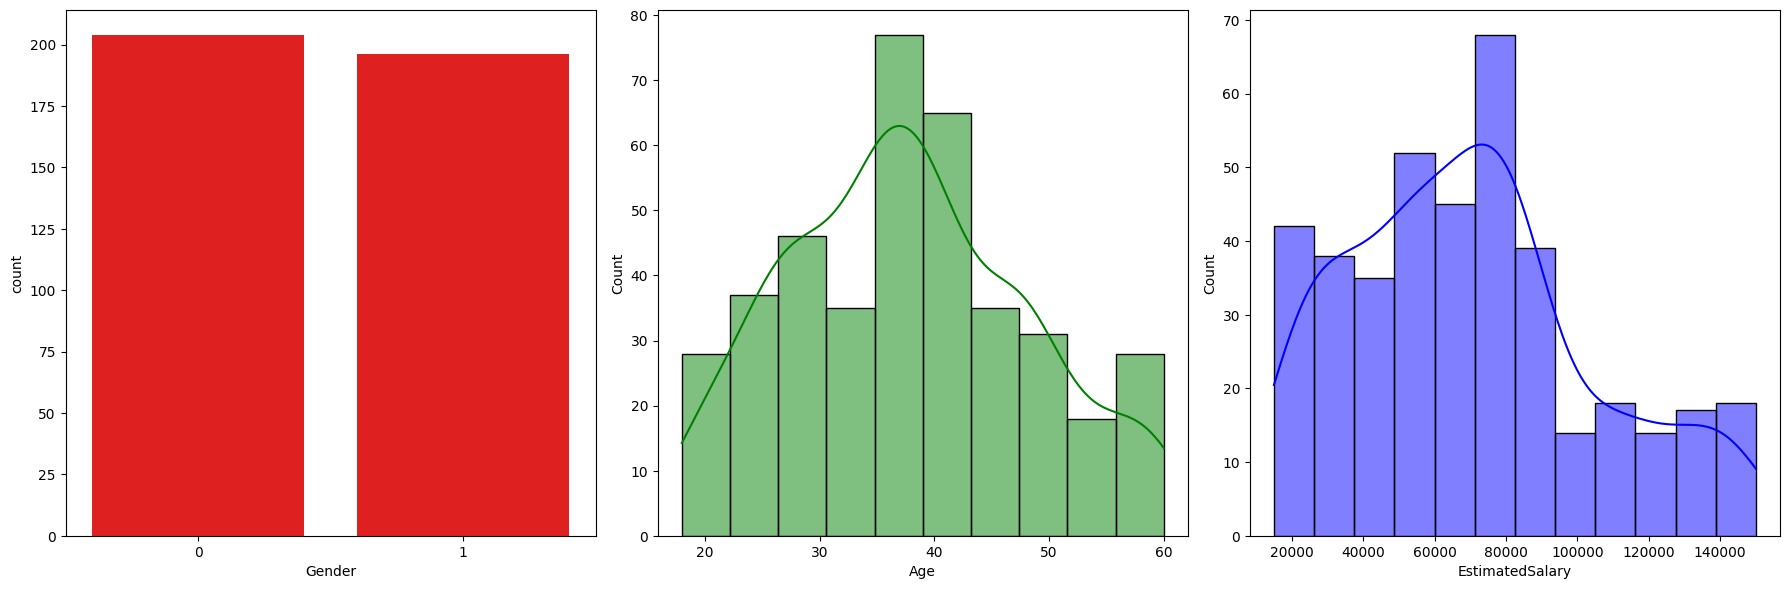

In [ ]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.countplot(data=df1, x='Gender', color='r')

plt.subplot(1, 3, 2)
sns.histplot(data=df1, x='Age', kde=True, color='g')

plt.subplot(1, 3, 3)
sns.histplot(data=df1, x='EstimatedSalary', kde=True, color='b')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

X = df1[[ 'Age', 'EstimatedSalary']]
y = df1['Purchased']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.92


## Dataset 3

In [ ]:
df2 = pd.read_csv('/content/german_credit_data.csv')
df2

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [ ]:
df2.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

### Data PreProcessing

In [ ]:
df2.drop(columns=['Unnamed: 0'], inplace=True)
df2.head(10)
# Dropping the unnamed column

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
5,35,male,1,free,NaN,NaN,9055,36,education,good
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good
7,35,male,3,rent,little,moderate,6948,36,car,good
8,61,male,1,own,rich,NaN,3059,12,radio/TV,good
9,28,male,3,own,little,moderate,5234,30,car,bad


In [ ]:
df2.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [ ]:
df2.dropna(inplace=True) # Dropping the null values

In [ ]:
df2.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2["Sex"] = le.fit_transform(df2["Sex"])
df2["Housing"] = le.fit_transform(df2["Housing"])
df2["Saving accounts"] = le.fit_transform(df2["Saving accounts"])
df2["Checking account"] = le.fit_transform(df2["Checking account"])
df2["Purpose"] = le.fit_transform(df2["Purpose"])
df2["Risk"] = le.fit_transform(df2["Risk"])

# Encoding each categorical value using label encoder

In [ ]:
df2

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
1,22,0,2,1,0,1,5951,48,5,0
3,45,1,2,0,0,0,7882,42,4,1
4,53,1,2,0,0,0,4870,24,1,0
7,35,1,3,2,0,1,6948,36,1,1
9,28,1,3,1,0,1,5234,30,1,0
...,...,...,...,...,...,...,...,...,...,...
989,48,1,1,1,0,1,1743,24,5,1
993,30,1,3,1,0,0,3959,36,4,1
996,40,1,3,1,0,0,3857,30,1,1
998,23,1,2,0,0,0,1845,45,5,0


<Axes: >

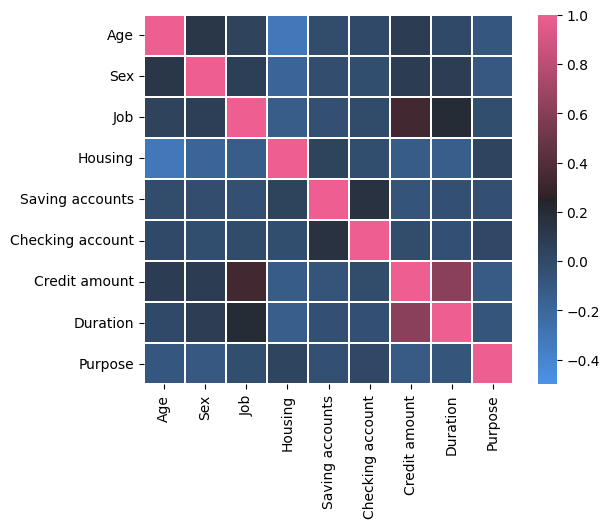

In [ ]:
corr = df2.iloc[:,:-1].corr(method="pearson")
cmap = sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=.2)

In [ ]:
df2 = df2[['Age', 'Sex', 'Job', 'Credit amount', 'Duration', 'Purpose', 'Risk']]
df2.head(10)

,Age,Sex,Job,Credit amount,Duration,Purpose,Risk
1,22,0,2,5951,48,5,0
3,45,1,2,7882,42,4,1
4,53,1,2,4870,24,1,0
7,35,1,3,6948,36,1,1
9,28,1,3,5234,30,1,0
10,25,0,2,1295,12,1,0
11,24,0,2,4308,48,0,0
12,22,0,2,1567,12,5,1
13,60,1,1,1199,24,1,0
14,28,0,2,1403,15,1,1


<Axes: xlabel='Duration', ylabel='Count'>

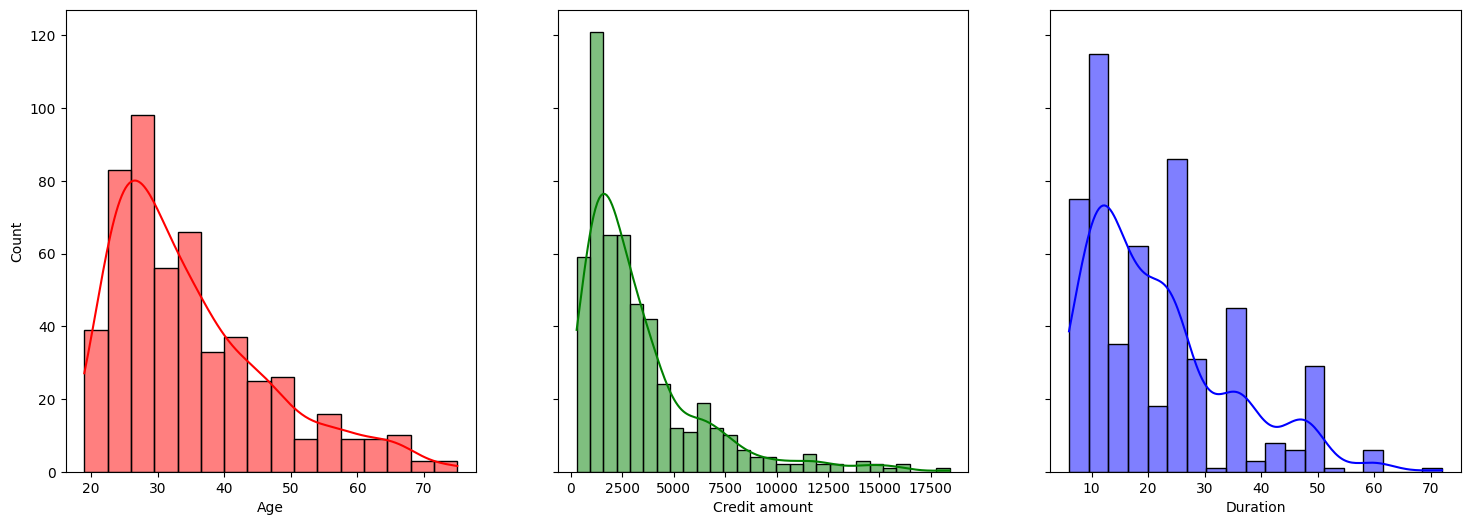

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
sns.histplot(df2, ax=axes[0], x="Age", kde=True, color='r')
sns.histplot(df2, ax=axes[1], x="Credit amount", kde=True, color='g')
sns.histplot(df2, ax=axes[2], x="Duration", kde=True, color='b')

In [ ]:
df2["cat_Age"] = pd.cut(df2["Age"].values, bins = 3, labels = [0,1,2])
df2["cat_Credit_amount"] = pd.cut(df2["Credit amount"].values, bins = 3, labels = [0,1,2])
df2["cat_Duration"] = pd.cut(df2["Duration"].values, bins = 3, labels = [0,1,2])

<ipython-input-85-dd54bbf0c662>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["cat_Age"] = pd.cut(df2["Age"].values, bins = 3, labels = [0,1,2])
<ipython-input-85-dd54bbf0c662>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["cat_Credit_amount"] = pd.cut(df2["Credit amount"].values, bins = 3, labels = [0,1,2])


In [ ]:
df2.drop(columns =['Age', 'Credit amount', 'Duration'])

,Sex,Job,Purpose,Risk,cat_Age,cat_Credit_amount,cat_Duration
1,0,2,5,0,0,0,1
3,1,2,4,1,1,1,1
4,1,2,1,0,1,0,0
7,1,3,1,1,0,1,1
9,1,3,1,0,0,0,1
...,...,...,...,...,...,...,...
989,1,1,5,1,1,0,0
993,1,3,4,1,0,0,1
996,1,3,1,1,1,0,1
998,1,2,5,0,0,0,1


In [ ]:
def calculate_likelihood_categorical(df2, feat_name, feat_val, Y, label):
    feat = list(df2.columns)
    df2 = df2[df2[Y]==label]
    p_x_given_y = len(df2[df2[feat_name]==feat_val]) / len(df2)
    return p_x_given_y

In [ ]:
def naive_bayes_categorical(df2, X, Y):
    features = list(df2.columns)[:-1]

    prior = calcPrior(df2, Y)
    Y_pred = []

    for x in X:
        labels = sorted(list(df2[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_categorical(df2, features[i], x[i], Y, labels[j])
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]
        Y_pred.append(np.argmax(post_prob))
    return np.array(Y_pred)

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df2, test_size=.3, random_state=41)
X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
Y_pred = naive_bayes_categorical(train, X=X_test, Y="Risk")
from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(Y_test, Y_pred))


[[113   1   0]
 [ 40   1   0]
 [  2   0   0]]


In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(Y_test, Y_pred, average="micro")
print(f1)

0.7261146496815287
